In [23]:
!pip install tiktoken

  Obtaining dependency information for tiktoken from https://files.pythonhosted.org/packages/16/05/5efbd91252ffb1301ea393d88ef736b33d41e75d4bcf0bd31d660050e400/tiktoken-0.6.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
  Obtaining dependency information for regex>=2022.1.18 from https://files.pythonhosted.org/packages/81/8a/96a62ce98e8ff1b16db56fde3debc8a571f6b7ea42ee137eb0d995cdfa26/regex-2023.12.25-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.9/40.9 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 21.4 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 774.0/774.0 kB 80.2 MB/s eta 0:00:00


In [1]:
import tiktoken

encoding = tiktoken.get_encoding("cl100k_base")

In [2]:
encoding.n_vocab

100277

In [2]:
with open("datasets/wmt-14-en-de/train.en", "r") as f:
    text_en = f.read()
texts_end = text_en.split("\n")

In [7]:
from time import time

In [34]:
import torch
import numpy as np

In [36]:
opt = torch.optim.Adam(params=[torch.tensor(0.0)], lr=0.01)

In [37]:
type(opt)

torch.optim.adam.Adam

In [30]:
en_tokens = torch.load("datasets/wmt-14-en-de/en_tokens.pt")

In [31]:
de_tokens = torch.load("datasets/wmt-14-en-de/de_tokens.pt")

In [32]:
en_tokens.shape

torch.Size([71, 50])

In [33]:
de_tokens.shape

torch.Size([71, 50])

In [27]:
inds = np.load("datasets/wmt-14-en-de/selected_inds.npy")

In [28]:
len(inds)

71

In [29]:
inds[:10]

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [9]:
batch_size = 64
tokenized_texts = []
start = time()
for i in range(0, len(texts_end), batch_size):
    if i % 1000 == 0:
        print(f"finished {i} lines, took {time() - start:.2f} seconds.")
    if i > 100000:
        break
    tokenized_texts.extend(encoding.encode_batch(texts_end[i:i+batch_size]))

finished 0 lines, took 0.00 seconds.
finished 8000 lines, took 0.72 seconds.
finished 16000 lines, took 1.44 seconds.
finished 24000 lines, took 2.15 seconds.
finished 32000 lines, took 2.89 seconds.
finished 40000 lines, took 3.60 seconds.
finished 48000 lines, took 4.31 seconds.
finished 56000 lines, took 5.02 seconds.
finished 64000 lines, took 5.74 seconds.
finished 72000 lines, took 6.45 seconds.
finished 80000 lines, took 7.17 seconds.
finished 88000 lines, took 7.90 seconds.
finished 96000 lines, took 8.81 seconds.


In [16]:
encoding.decode([198, 198, 198])

'\n\n\n'

In [10]:
tokenized_lens = [len(t) for t in tokenized_texts]

In [11]:
import matplotlib.pyplot as plt

(array([1.7100e+03, 5.6060e+03, 8.1050e+03, 9.5350e+03, 1.0025e+04,
        9.1660e+03, 5.4950e+03, 7.3180e+03, 6.5720e+03, 5.8200e+03,
        4.9870e+03, 4.2910e+03, 3.6310e+03, 2.1020e+03, 2.6510e+03,
        2.1340e+03, 1.9520e+03, 1.5470e+03, 1.1880e+03, 6.9900e+02,
        9.0400e+02, 7.2700e+02, 6.3500e+02, 5.0000e+02, 4.3900e+02,
        3.9200e+02, 2.3000e+02, 3.0000e+02, 2.4400e+02, 2.0900e+02,
        1.5700e+02, 1.5100e+02, 1.1700e+02, 7.7000e+01, 9.1000e+01,
        7.3000e+01, 5.1000e+01, 4.5000e+01, 3.4000e+01, 2.0000e+01,
        2.0000e+01, 1.4000e+01, 1.8000e+01, 1.3000e+01, 7.0000e+00,
        3.0000e+00, 2.0000e+00, 1.0000e+00, 5.0000e+00, 2.0000e+00,
        5.0000e+00, 1.0000e+00, 1.0000e+00, 2.0000e+00, 0.0000e+00,
        1.0000e+00, 0.0000e+00, 1.0000e+00, 1.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 1.0000e+00, 1.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.00

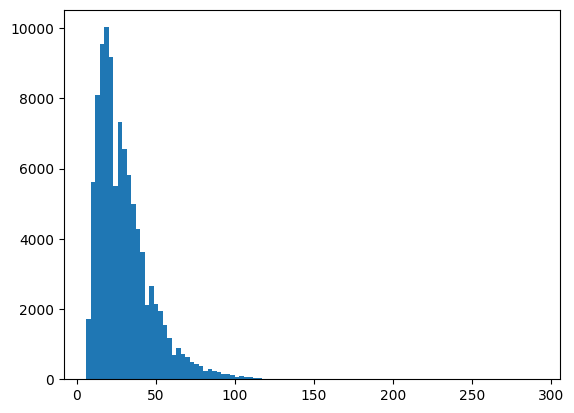

In [12]:
plt.hist(tokenized_lens, bins=100)

In [21]:
with open("input.txt", "r") as f:
    text = f.read()

In [7]:
print(text[:100])

First Citizen:
Before we proceed any further, hear me speak.

All:
Speak, speak.

First Citizen:
You


In [8]:
encoded_text = encoding.encode(text)

In [11]:
len(encoded_text)

301829

In [12]:
len(text)

1115394

In [24]:
from src.dataset import TextData, NaiveEncoder

In [25]:
dataset = TextData("input.txt", batch_size=4, block_size=32)

In [9]:
x, y = dataset.get_batch()

In [10]:
x.shape

torch.Size([4, 32])

In [26]:
encoder = NaiveEncoder(text)

In [12]:
encoder.decode(x[0, :].numpy().tolist())

'uld think.\n\nSecond Servingman:\nS'

In [10]:
encoding.n_vocab

100277

In [3]:
import torch
from src.model import Decoder

In [4]:
model = Decoder(
    n_vocab=65,
    block_size=64,
    n_layer=3,
    n_embd=256,
    n_head=4,
    n_inner=1024,
)
model.load_state_dict(torch.load("models/2024-02-23_18-14-17/model_batch_size-32_block_size-64_encode_scheme-naive_lr-0.0006_n_embd-256_n_head-4_n_inner-1024_n_layer-3_iter-100000.pt"))

<All keys matched successfully>

In [5]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [6]:
model = model.to(device)

In [9]:
model.eval()
context = torch.zeros(1, 64, dtype=torch.long).to(device)

In [10]:
with torch.no_grad():
    logits = model(context)

/opt/conda/envs/pytorch/lib/python3.10/site-packages/torch/nn/modules/activation.py:1160: UserWarning: Converting mask without torch.bool dtype to bool; this will negatively affect performance. Prefer to use a boolean mask directly. (Triggered internally at /opt/conda/conda-bld/pytorch_1686274778240/work/aten/src/ATen/native/transformers/attention.cpp:150.)
  return torch._native_multi_head_attention(


In [11]:
logits.shape

torch.Size([1, 64, 65])

In [12]:
import torch.nn.functional as F

In [13]:
logits = logits[:, -1, :]
probs = F.softmax(logits, dim=-1)

In [15]:
probs.shape

torch.Size([1, 65])

In [16]:
idx_next = torch.multinomial(probs, num_samples=1)

In [18]:
idx_next.shape

torch.Size([1, 1])

In [19]:
context = torch.cat([context, idx_next], dim=-1)

In [20]:
context.shape

torch.Size([1, 65])

In [27]:
context.shape

torch.Size([1, 65])

In [29]:
context = context.to("cpu").tolist()

In [31]:
context

[[0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  29]]

In [32]:
encoder.decode(context[0])

'\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nQ'